# Kodlabb - *Gradient descent*

### Förkunskaper
- Matte 3: Derivata

# Inledning
En dator gör enbart det vi säger åt den med vår programmering, men det går att be en dator att utforska hur väl en viss programkod presterar och att söka efter den bästa versionen av programkoden. Detta är _maskininlärning_ (ML), och den bästa versionen av programkoden är den _artificiella intelligensen_ (AI).

Maskininlärning är ofta bara en minimering av en funktion. Föreställ dig att $f(x)$ beskriver summan av alla misstag en mjukvara presterar med inställningen $x$, isåfall kan vi hitta en mycket bra inställning av mjukvaran genom att hitta funktionens minpunkter. $x$ kommer dock inte vara en [skalär][1], utan en [vektor][2] med tusentals eller miljontals komponenter.

Titta på minst en av videofilmerna nedan.

|Elon Musk's 'Dota 2' Experiment is Disrupting Esports in a Big Way|Meet the dazzling flying machines of the future|
|:-|:-|
|[![][img1]][vid1]|[![][img2]][vid2]|
|*YouTube: En artificiell intelligens har besegrat Dota2 proffs i dueller (Augusti 2017).*|*YouTube: De flesta quadrokoptrar styrs med hjälp av AI, tränad med ML.*|

|Real-Time Facial Expression Transfer|A.I. Experiments: Giorgio Cam|
|:-|:-|
|[![][img3]][vid3]|[![][img4]][vid4]|
|*YouTube: En AI kopplar en skådespelares ansiktsuttryck till ett annat ansikte.*|*YouTube: Använd befintlig AI för att känna igen föremål i bilder, översätta språk m.m.*|

[1]: https://en.wikipedia.org/wiki/Scalar_(mathematics)
[2]: https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)

[img1]: https://img.youtube.com/vi/jAu1ZsTCA64/0.jpg
[vid1]: https://www.youtube.com/watch?v=jAu1ZsTCA64
[img2]: https://img.youtube.com/vi/RCXGpEmFbOw/0.jpg
[vid2]: https://www.youtube.com/watch?v=RCXGpEmFbOw
[img3]: https://img.youtube.com/vi/mkI6qfpEJmI/0.jpg
[vid3]: https://www.youtube.com/watch?v=mkI6qfpEJmI
[img4]: https://img.youtube.com/vi/eKeI63VSpto/0.jpg
[vid4]: https://www.youtube.com/watch?v=eKeI63VSpto&list=PLOU2XLYxmsIKubpTZNmgNKL6ToSQ1pWmy&index=2

### Fråga 1

> __Fråga:__ Besvara frågorna i svarscellen nedan, dubbelklicka på cellen för att börja skriva och kör cellen för att presentera resultatet.

* Vilka filmer såg du?
* Vad skulle du vilja använda AI till?

### Svar

Jag såg alla. Vilka API:n finns och är enkla att använda?

# Let's go!
Nu ska du få börja koda! Du kommer få testa och lära dig om _gradient descent_ (GD). Algoritmen hjälper dig att hitta en funktions minimipunkter, och är en mycket bra och välanvänd strategi för maskininlärning - du kan träna upp en AI med den.

### Kodkomplettering 1

> __Kodkomplettering:__ Här ska du skriva och testköra kod utifrån instruktioner.

Vi behöver en funktion med ett antal minimipunkter att testa algoritmen på.

Definiera pythonfunktion `f` så att den beter sig precis som den matematiska funktionen $f(x, y)$ nedan. Använd dig av `numpy` bibliotekets funktioner `np.sin`, `np.cos` och `np.exp` tillsammans med Pythons `**` operator (`x**2`$=x^2$).

$$f(x, y) = \sin(\,({\frac{x}{2}-2})^2 + (\frac{y}{2}-2)^2\,) \cdot \cos(\,x-y+e^{-y}\,)$$

In [17]:
import numpy as np
from simulation import Sim
sim = Sim()
import math

In [30]:
def f(x, y):
    """The function to investigate described above, it should return
    a value for all numerical inputs x and y."""
    ### BEGIN SOLUTION
    #return float(x**2 + math.sin(y))
    return np.sin((x/2-2)**2 + (y/2-2)**2) * np.cos(x-y + np.exp(-y))
    ### END SOLUTION

In [25]:
xs = range (-2,3)
ys = range (-2,3)
for x in xs:
    for y in ys:
        print (f(x,y))

3.090702573174318
3.1585290151921033
4.0
4.841470984807897
4.909297426825682
0.09070257317431829
0.1585290151921035
1.0
1.8414709848078965
1.9092974268256817
-0.9092974268256817
-0.8414709848078965
0.0
0.8414709848078965
0.9092974268256817
0.09070257317431829
0.1585290151921035
1.0
1.8414709848078965
1.9092974268256817
3.090702573174318
3.1585290151921033
4.0
4.841470984807897
4.909297426825682


In [27]:
import plotly.express as px

In [28]:
iris = px.data.iris()

In [29]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

|Result|Reason|
        |:-|:-|
        |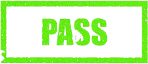|All tests passed.|

In [31]:
# Test and visualize your code as a 3D graph.
# - Two dimensions represents the inputs x and y, and the third represents
#   the output z = f(x,y)
sim.setup_f(f)
sim.run(show_2d=False)

### Studiestund 1

> __Studiestund__: Stanna till och lär dig om relevant material inför kommande uppgifter.

Innan vi fortsätter behöver vi utvidga våra kunskaper från Matte 3 och lära oss om _funktioner av flera variabler_, _partiell derivata_ och _gradienter_.

####  Funktioner av flera variabler

En _definitionsmängd_ eller en _domän_ är inom matematiken mängden av alla möjliga värden du kan stoppa in i en funktion, och en _värdemängd_ är alla värden du kan få av en funktionen.

> __Förstår du?__

> Vad har denna funktion tänkt att ha för definitionsmängd och värdemängd? Vad kan du stoppa in i funktionen, och vad kan du få ut från funktionen?
> ```python
def getWordLength(word):
    return len(word)
>```

Vissa funktioner har en flerdimensionell definitionsmängd och tar emot flera variabler. Funktionerna $g$ och $h$ har exempelvis definitionsmängder som är två- och tredimensionella.

\begin{align}
f(x)     & = x^2         & f(2)     & = 4  \\
g(x,y)   & = x^2+y^2     & f(2,3)   & = 13 \\
h(x,y,z) & = x^2+y^2+z^2 & f(2,3,4) & = 29 \\
\end{align}

> __Förstår du?__

> Är $g(x,y)$ och $h(x,y,z)$:s _värdemängder_ endimensionella eller flerdimensionella?
>
> $f(x)$ och $g(x,y)$:s definitionsmängd kan motsvaras av en linje och en yta, vad kan $ħ(x,y,z)$:s definitionsmängd motsvaras av?

#### Partiell derivata och gradienter

Tänk dig att du är en robotmyra utan syn på en spishäll och enbart kan mäta temperaturen precis du står. Du behöver ta dig till säkerhet och går sönder om du går över en varm spisplatta. Tänk på temperaturen som funktionen $T(x,y)$. Som handlingskraftig robotmyra sträckte du __fram__ ett av dina ben och märkte att temperaturen __ökade med en grad__. Du stod kvar och sträckte ut ett myrben åt __höger__ och märkte att temperaturen __minskade med en grad__. Som robotmyra undersökte du precis temperaturfunktions _partiella derivata_ för där du står just nu, du fick två värden, en för varje dimension du kan röra dig i. Om du kan lista ut vilket håll du borde undvika att gå mot, där temperaturen ökar som mest, har du även hittat riktningen på _gradienten_.

> __Förstår du?__

> Vilket håll bör myran gå åt för undvika värmen?

Titta nu på följande film och besvara därefter några kontrollfrågor.

|Gradients and Partial Derivatives|
|:-|
|[![](https://img.youtube.com/vi/GkB4vW16QHI/0.jpg)](https://www.youtube.com/watch?v=GkB4vW16QHI)|
|*YouTube: Lär dig om [partiell derivata](https://sv.wikipedia.org/wiki/Partiell_derivata) och [gradientvektorer](https://sv.wikipedia.org/wiki/Gradient) $\nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$*|

### Fråga 2
I bilden ovan ser vi en funktion $z=h(x,y)$ representerad som en yta (2D) i en volym (3D). Föreställ dig att du är en robotmyra på den ytan.
- a) Beskriv vart du skulle gå om du följde gradienten och stod i en backe.
- b) Beskriv vart du skulle gå om du följde gradienten och stod på en kulles topp.
- c) Beskriv vad det engelska ordet *descent* betyder och gissa hur algoritmen _gradient descent_ fungerar.

### Svar

Gradienten av en skalärvärd funktion vars definitionsmängd är tvådimensionell, är en tvådimensionell vektor bestående av funktionens partiella derivata. Gradienten kommer peka längst med definitionsmängden åt det håll som funktionens värde ökar mest.

* a) Jag skulle gått uppför backen.
* b) Eftersom funktionsvärdet ökar inte åt något håll på en kulles topp, skulle de partiella derivatorna vara noll, och gradienten vara nollvektorn utan riktning. Jag hade stått still.
* c) *Descent* betyder att gå neråt. Kanske är det som en myra som går rakt nedåt, med andra ord åt det motsatta hållet av gradienten?

### Kodkomplettering 2
*Gradient descent* bygger på att vi kan promenera antiparallellt (åt andra hållet) till gradienten, och gradienten som är en vektor, kan bestämmas om vi känner till de partiella derivatorna. Vi kan beräkna de partiella derivatorna ungefärligt med ett litet värde på $h$ på följande sätt.

$$\frac{\partial f}{\partial x} \approx \frac{f(x+h, y) - f(x-h, y)}{2h}$$

$$\frac{\partial f}{\partial y} \approx \frac{f(x, y+h) - f(x, y-h)}{2h}$$

Vi använder oss av en så kallad *central differenskvot* - central eftersom vi tittar på ett funktionsvärde till både vänster och höger om en punkt, och differenskvot för att det är en kvot vars täljare och nämnare består av differenser. Centrala differenskvoter är lämpliga att använda för att uppskatta derivata numeriskt.

Ditt uppdrag är att komplettera funktionerna nedan, så att de numeriskt beräknar de partiella derivatorna för funktionen `f`.

In [32]:
h = 0.001
def df_dx(x, y):
    """Return an approximate value for the partial derivative of the function f with respect to x, as described above."""
    ### BEGIN SOLUTION
    return (f(x+h,y) - f(x-h,y)) / (2*h)
    ### END SOLUTION
def df_dy(x, y):
    """Return an approximate value for the partial derivative of the function f with respect to y, as described above."""
    ### BEGIN SOLUTION
    return (f(x,y+h) - f(x,y-h)) / (2*h)
    ### END SOLUTION

|Result|Reason|
        |:-|:-|
        |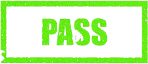|All tests passed.|

In [33]:
# Test and visualize your code, the arrows are created using df_dx and df_dy.
sim.setup_grad_f(df_dx, df_dy)
sim.run(show_3d=False)

### Fråga 4
Ovan ser du förhoppningsvis nu ett [färgdiagram][1] (heat map) där röda färger motsvarar höga funktionsvärden och blåa färger motsvarar låga. I diagrammet finns även [konturlinjer (också kallat *isaritmer* och *isolinjer*)][2].

* a) Beskriv vad vektorerna (pilarna) motsvarar.
* b) Beskriv hur pilarna pekar kring extrempunkterna.
* c) Om du gjort rätt kommer pilarna inte peka längs med konturlinjerna, varför inte?

[1]: https://sv.wikipedia.org/wiki/F%C3%A4rgdiagram
[2]: https://sv.wikipedia.org/wiki/Isaritm

### Svar

* a) Gradientvektorer - de pekar mot ökande funktionsvärden.
* b) Gradientvektorerna pekar mot maximipunkter och bort ifrån minimipunkter.
* c) För att funktionens värde är samma längst med konturlinjerna, och gradienten pekar längst med definitionsmängden mot ökande funktionsvärden.

### Studiestund 2

Nu är du redo för själva gradient descent algoritmen.

> __Gradient descent:__ att ta steg efter steg i en funktions definitionsmängd motriktat gradienten [proportionella][1] till gradientens storlek tills du tar så små steg att du anser dig framme eller helt enkelt tagit för många.

Algoritmens möjlighet att hitta minimivärden för funktioner är otroligt betydelsefull för maskininlärning (ML) och har gett upphov till en mängd AI. Allt genom att minimera funktioner.

Du har kanske hört talas om neurala nätverk (neural networks - NN), som eventuellt är stora/djupa (deep neural networks - DNN), eller har en viss struktur (convolutional neural networks - CNN)? Alla neurala nätverk måste få sina reglage som avgör hur de beter sig inställda, gradient descent kan hitta bra inställningar på dessa genom att minimera den hundratusentalsdimensionella funktionen som beskriver alla fel nätverket gjort på tusentals övningsexempel.

Titta på den andra filmen __mellan 5:21 och 12:18__ så får du en välpresenterad förklaring av gradient descent, skulle du titta på båda filmerna får du en inblick i neurala nätverk.

But what *is* a neural network? &#124; Deep learning, Part 1|Gradient descent, how neural networks learn &#124; Deep learning, Part 2
:-|:-
[![][img1]][vid1]|[![][img2]][vid2]
*YouTube: Del 1 i serien om neurala nätverk.*|*YouTube: Från 5:21 till 12:18 i filmen får du lära dig det du behöver veta om algoritmen gradient descent. Del 2 i serien om neurala nätverk.*

[1]: https://sv.wikipedia.org/wiki/Proportionalitet_(matematik)

[img1]: https://img.youtube.com/vi/aircAruvnKk/maxresdefault.jpg
[vid1]: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1
[img2]: https://img.youtube.com/vi/IHZwWFHWa-w/maxresdefault.jpg
[vid2]: https://www.youtube.com/watch?v=IHZwWFHWa-w&index=2&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&t=5m21s

### Fråga 3
* a) Gradient descent hjälper oss att hitta en minimipunkt, är den globala eller lokal?
* b) Hur många dimensioner har gradientvektorerna till f(x,y)=z och varför?
* c) Låt oss anta att du känner till gradienten av funktionen för en punkt där du är nu, åt vilket håll bör du försöka gå för att hitta en minimipunkt?

### Svar

* a) Det går att hitta en global minimipunkt men inte att få reda på att det var en global snarare än lokal. Vet du däremot lite mer om din funktion, såsom att den är en så kallad *konvex funktion*, kan du veta att du hittat globala minimipunkten om du hittat en lokal minimipunkt eftersom dessa maximalt kan ha en minimipunkt.
* b) Två, gradientvektorerna pekar alltid längst med definitionsmängden, de är skapade med hjälp av partiella derivata som beskriver hur funktionsvärdet förändras när man förflyttar sig inom definitionsmängden.
* c) Du bör gå åt det motsatta hållet till gradienten för att komma närmare en eventuell minimipunkt.

### Kodkomplettering 3

Du ska nu skapa en funktion som tar __ett__ steg i definitionsmängden av funktionen $f(x,y)$ i motsatt riktning till gradienten och anpassar det stegets längd utifrån hur lång gradientvektorn är samt en konstant $\alpha$ (alpha) som vi kan kalla för en _steglängdsfaktor_ (step size multiplier / the learning rate). Ett högt alpha värde gör att vi raskt rör oss mot minimipunkten. Här är en beskrivning över vad din kod ska göra.

\begin{align}
\text{new_x} \gets x - \alpha \cdot \frac{\partial f}{\partial x}(x, y)\\
\\
\text{new_y} \gets y - \alpha \cdot \frac{\partial f}{\partial y}(x, y)\\
\end{align}

Funktionen `gradient_descent_step` ska även räkna ut hur långt det föreslagna steget var, detta kan göras med pythagoras sats och [`np.sqrt`][1] eller med [`np.linalg.norm`][2].
 
[1]: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sqrt.html
[2]: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html

In [34]:
alpha = 0.2
def gradient_descent_step(x, y, alpha=alpha):
    ### BEGIN SOLUTION
    new_x = x - alpha * df_dx(x, y)
    new_y = y - alpha * df_dy(x, y)
    #step_size = np.linalg.norm((new_x - x, new_y - y))
    step_size = np.sqrt((new_x - x)**2 + (new_y - y)**2)
    ### END SOLUTION
    return new_x, new_y, step_size

|Result|Reason|
        |:-|:-|
        |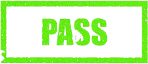|All tests passed.|

In [35]:
# Verify you got it right
sim.setup_gds(gradient_descent_step)

# Resultat
Testköra och experimentera med algoritmen med denna kod som bygger på det du gjort tidigiare.

In [8]:
# Experiment with these values
# - Add/move starting points to find all minima in between (0,0) and (5,5)
# - Analyze what happens with a large step size multiplier (alpha).
starting_points = [(2, 2), (2, 3), (3, 2), (3, 3)]
alpha = 0.2                
min_step_size = 0.001
max_steps = 100

# ------------------------------------------------------------------------------

# Runs gradient descent until our steps becomes too small (< min_step_size) or
# we have taken the maximum amount of steps
sim.gd_trails = []
for starting_point in starting_points:
    x, y = starting_point
    gd_trail = np.array([[x, y, f(x,y)]])
    latest_step_length = np.inf

    while latest_step_length > min_step_size and len(gd_trail) <= max_steps:
        x, y, latest_step_length = gradient_descent_step(x, y, alpha=alpha)
        gd_trail = np.append(gd_trail, [[x, y, f(x,y)]], axis=0)

    sim.gd_trails.append(gd_trail)
    print('Ran GD from f({:.2f}, {:.2f})={:5.2f} to f({:.2f}, {:.2f})={:5.2f} after {} steps.'.format(*gd_trail[0,:], *gd_trail[-1,:], len(gd_trail)))

sim.run()

Ran GD from f(2.00, 2.00)= 0.90 to f(0.77, 1.10)=-1.00 after 15 steps.
Ran GD from f(2.00, 3.00)= 0.55 to f(1.60, 4.74)=-1.00 after 77 steps.
Ran GD from f(3.00, 2.00)= 0.40 to f(4.45, 1.53)=-1.00 after 68 steps.
Ran GD from f(3.00, 3.00)= 0.48 to f(3.99, 3.99)= 0.00 after 50 steps.


### Fråga 5
Undersök på egen hand och försök besvara följande frågor.

- a) Hur många minimipunkter mellan (0,0) och (5,5) fanns det och vilken har högst funktionsvärde? ( $f(x,y)=z$ )
- b) Undersök och beskriv för och nackdelar med låga och höga värden på steglängdsfaktorn (alpha).
- c) Undersök och beskriv för och nackdelar med låga och höga värden på `min_step_size`?

### Svar
* a) f(4,4) = 0
* b) När `alpha` (the learning rate / step size multiplier) är för hög, så kan man gå förbi minimipunkten och hamna på andra sidan. Detta kan leda till att man studsar omkring kring minimipunkten utan att stanna upp på den.
* c) Med för låga/höga värden på `min_step_size` så körs algoritmen onödigt länge/för kort och slutar onödigt nära minimipunkten respektive för långt bort från minimipunkten.

# Avslutning
Grattis! Är du klar?

### Kontrollera din kod
Testkör din kod __Kernel > Restart & Run all__ i menyraden och __Validate__ knappen i verktygsraden.

### Maila din mattelärare
Få en kopia på ditt arbete genom __File > Download as > HTML (.html)__, maila din mattelärare och visa upp att du genomfört labben!

# Fortsättning
Det finns mycket att lära sig inom ML/AI. Här är tips på fortsättningar.

### Använd befintlig AI
Du behöver inte lära dig ML och träna din egen AI - du kan använda befintlig AI genom av fritt tillgängliga [APIer](https://sv.wikipedia.org/wiki/Application_Programming_Interface).

|A.I. Experiments|Getting Started in 3 Minutes with API.AI|
|:-|:-|
|[![](https://img.youtube.com/vi/oOwfiYnRi5c/0.jpg)](https://www.youtube.com/watch?v=oOwfiYnRi5c&list=PLOU2XLYxmsIKubpTZNmgNKL6ToSQ1pWmy)|[![](https://img.youtube.com/vi/Om7tyGGemXI/0.jpg)](https://www.youtube.com/watch?v=Om7tyGGemXI)
|*YouTube playlist: Flera av apparna som demonstreras använder sig av APIer.*|*YouTube: api.ai hjälper din mjukvara att ta beslut utifrån vad användaren säger.*|

### Python
Alla programmeringsspråk kan använda ML, men det är till Python som det utvecklas mest spännande stödbibliotek just nu.

Python - Basics|Python - Intermediate
:-|:-
[![](https://img.youtube.com/vi/IX6mc9l6tY4/0.jpg)](https://pythonprogramming.net/introduction-to-python-programming/)|[![](https://img.youtube.com/vi/YSe9Tu_iNQQ/0.jpg)](https://pythonprogramming.net/introduction-intermediate-python-tutorial/)
*Kurs och YouTube playlist: En grundkurs i Python.*|*Kurs och YouTube playlist: En fortsättningskurs i Python.*

### Grunderna i ML
Vill du använda ML för att träna en AI på egen hand? Då kan vara bra att börja här. Skapa dig en en översikt av ML innan du beger sig in i de mer avancerade teknikerna och lär dig vad *Supervised* respektive *Unsupervised learning* innebär exempelvis. I dessa filmer stöter du på grundtekniker såsom *linear regression*, *support vector machines*, *decision trees* med mera.

Python - Machine Learning|Machine Learning Recipes
:-|:-
[![](https://img.youtube.com/vi/OGxgnH8y2NM/0.jpg)](https://pythonprogramming.net/machine-learning-tutorial-python-introduction/)|[![](https://img.youtube.com/vi/cKxRvEZd3Mw/0.jpg)](https://www.youtube.com/watch?v=cKxRvEZd3Mw&list=PLRAcvynLm0SCOJ7Ik3Q58-DTOKgY5h0Ky)
*Kurs och YouTube playlist: En grundkurs i ML.*|*YouTube playlist: Kort och praktiskt - en kokbok för ML.*

### Avancerat: Neurala nätverk, *deep learning* och matematik
Det finns många varianter av ML, och de har sina styrkor och svagheter. Neurala nätverk ligger som grund till några av de mest avancerade ML teknikerna i skrivande stund.

Neural networks|The Math of Intelligence
:-|:-
[![](https://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)|[![](https://img.youtube.com/vi/xRJCOz3AfYY/0.jpg)](https://www.youtube.com/watch?v=xRJCOz3AfYY&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D)
*YouTube playlist: Ger insikt om neurala nätverk.*|*YouTube playlist: Teoretiskt om matematiken i ML.*

Neural Networks Demystified|Learning To See
:-|:-
[![](https://img.youtube.com/vi/bxe2T-V8XRs/0.jpg)](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU)|[![](https://img.youtube.com/vi/i8D90DkCLhI/0.jpg)](https://www.youtube.com/watch?v=i8D90DkCLhI&list=PLiaHhY2iBX9ihLasvE8BKnS2Xg8AhY6iV)
*YouTube playlist: Ger teknisk och matematisk bakom hur neurala nätverk fungerar.*|*YouTube playlist: Om utmaningar och lösningar för att träna en dator att räkna fingrar.*